In [2]:
!pip install wquantiles

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

### Estimates of location

In [5]:
state = pd.read_csv('state.csv')
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [6]:
# mean
print(state['Population'].mean())

6162876.3


In [7]:
# trimmed mean
print(trim_mean(state['Population'], 0.1))


4783697.125


In [8]:
#median

print(state['Population'].median())


4436369.5


In [9]:
#weighted mean
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


In [10]:
# weighted median
print(wquantiles.median(state['Murder.Rate'], weights=state['Population']))


4.4


### Estimates of Variability

In [11]:
# standard deviation

print(state['Population'].std())


6848235.347401142


In [12]:
# IQR 

print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))


4847308.0


In [13]:
# median absolute deviation

print(robust.scale.mad(state['Population']))


3849876.1459979336


### Percentiles

In [14]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


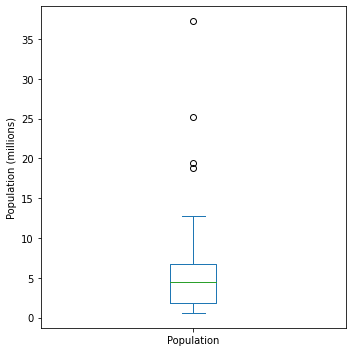

In [19]:
ax = (state['Population']/1000000).plot.box(figsize=(5, 5))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

### Frequency table

In [16]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


### Histogram

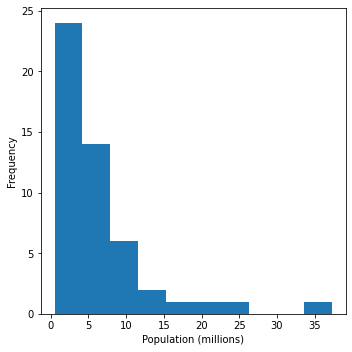

In [18]:
ax = (state['Population'] / 1000000).plot.hist(figsize=(5, 5))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

### Density Estimates

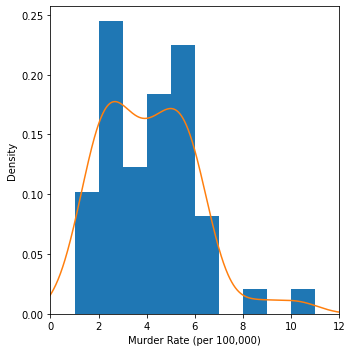

In [21]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(5, 5))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()